## First construct a relation between the surface velocity and Glen's flow law / shear strain rate

Stress-strain relation for ice:
  $\dot \epsilon = 2 A_0 e^{- \frac {Q} {RT} } \cdot \sigma^n$

The horizonta shear stress at a height z is: $\sigma = \rho \cdot g \cdot (H - z) \cdot \sin(\alpha)$ 

- z:
    - height above ground
- H:
    - height of the ice shield, the surface
- $\alpha$:
    - sloping angle of the surface
- $\rho$:
    - density of ice in $kg/m^3$

With $A = A_0 \exp( \frac{-Q}{RT} )$:

$\dot \epsilon = 2 \cdot A \cdot \rho^n \cdot \sin(\alpha)^n \cdot g^n \cdot (H - z)^n$

$v_z = \int_0^z \dot \epsilon$ 

## Now A1 vs A2

Paul is right:  $A_0^{T \leq 258}$ and $A_0 ^{T > 258}$ (for T <= 258) are linearly related, because $A_0^{T \leq 258} = A_0 ^{T > 258} \cdot \exp\left(\frac{Q^{T \leq 258} - Q^{T > 258}}{R \cdot 258}\right)$

In numbers: 
- $A_0^{T \leq 258} = \exp\left(\frac{-121} {8.314 \cdot 258} \right) \cdot A_0 ^{T > 258} = 0.945 \cdot A_0 ^{T > 258}$

In [ ]:
pretty_print_default()
var('A, n, rho, g, H, z, Q, R, T, alpha')

**Indefinite integration for n=3**

In [4]:
n = 3
v(z) = 2 * A * sin(alpha)**n * rho**n * g**n * (H - z)**n * (1 / 1e6)**n
integrate(v(z), z)

(4.999999999999999e-19)*(4*H^3*z - 6*H^2*z^2 + 4*H*z^3 - z^4)*A*g^3*rho^3*sin(alpha)^3

**Indefinite integration for n=4**

In [5]:
n = 4
v(z) = 2 * A * sin(alpha)**n * rho**n * g**n * (H - z)**n * (1 / 1e6)**n
integrate(v(z), z)

(3.9999999999999992e-25)*(5*H^4*z - 10*H^3*z^2 + 10*H^2*z^3 - 5*H*z^4 + z^5)*A*g^4*rho^4*sin(alpha)^4

# Deriving A0 from several layers of differently temperated ice

## Functions for n = 3 and n = 4

Caution: the parameter (Q = 181 kJ/mol) is set to the value for n = 4, as given in the Goldsby paper

In [6]:
R = 0.008314 # kJ / (T*mol)
g = 9.81 # m/s^2

Q = 181 # kJ/mol, activation energy

H = 2500 # m, height of the ice sheet
rho = 920 # kg/m^3, density of ice

pi = 3.1415

surf_velocity = 10.0 # m/a, velocity of ice
alpha = 0.75 / 180. * pi

linearA0Factor = exp((60. - 181.) / (R * 258.))

def A0n4(T, Z):
    
    T = [t + 273 for t in T]
    zu = 0
    v = 0
    
    for t, z in zip(T, Z):
        zl = zu
        zu = z
        
        if t <= 258:
            v = v + ( 5*H**4*zu - 10*H**3*zu**2 + 10*H**2*zu**3 - 5*H*zu**4 + zu**5 ) * exp(-Q / (R*t)) * linearA0Factor
            v = v - ( 5*H**4*zl - 10*H**3*zl**2 + 10*H**2*zl**3 - 5*H*zl**4 + zl**5 ) * exp(-Q / (R*t)) * linearA0Factor
        else:
            v = v + ( 5*H**4*zu - 10*H**3*zu**2 + 10*H**2*zu**3 - 5*H*zu**4 + zu**5 ) * exp(-Q / (R*t))
            v = v - ( 5*H**4*zl - 10*H**3*zl**2 + 10*H**2*zl**3 - 5*H*zl**4 + zl**5 ) * exp(-Q / (R*t))

    v = v * 4e-25 * sin(alpha)**4 * g**4 * rho**4
    A0 = surf_velocity / v
    A0 = A0 / (86400*365)
    
    # return first A0 for T > 258, then A0 for T <= 258
    return (A0, A0 * linearA0Factor)


### For 2 layers with n=4

A0 (T > 258) = 6.45945638960678e27, A0 (T <= 258): 2049.60392205052


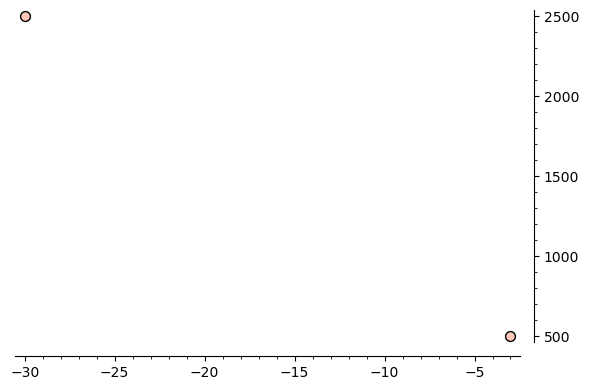

In [7]:
Z = [500, 2500]
T = [-3, -30]

A0highT, A0smallT = A0n4(T, Z)
print("A0 (T > 258) = " + str(A0highT) + ", A0 (T <= 258): " + str(A0smallT))

points = [[i, j] for i, j in zip(T,Z)]
scatter_plot(points)

## For 250 layers with n=4, defined using a parabolic equation

C: critical depth
0 = surface height

* z < C: 
	* $T(z) = T_0$
* z > C: 
	* $T(z) = T_0 + (T_{bed}-T_0) \cdot { \left( \frac{z - C} {z_{bed}-C} \right) }^2$

A0 (T > 258) = 1.19114541397701e29, A0 (T <= 258): 37795.3834652080


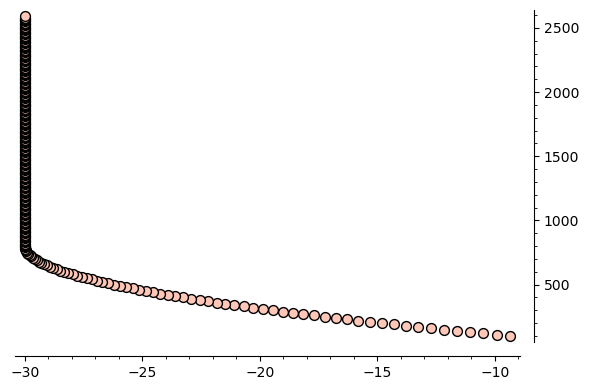

In [10]:
T0 = -30. # °C
Tbed = -3 # °C
C = 800 # m
Height = 2500

NumberOfBeds = 250

DeltaT = Tbed - T0

Z = [ i for i in range (100, Height + 100, Height / NumberOfBeds) ]
T = [T0 + DeltaT * ((1 - (z / C))**2) if z < C else T0 for z in Z ]

A0highT, A0smallT = A0n4(T, Z)
print("A0 (T > 258) = " + str(A0highT) + ", A0 (T <= 258): " + str(A0smallT))

points = [[j, i] for i,j in zip(Z,T)]
a = scatter_plot(points)
a.show()

## Now doublecheck if this is in agreement with Goldsbys results

For T = 258 (and corrected for seconds, not years), we should have similar $A = A_0 \cdot \exp \left( \frac{-Q}{R\cdot 258}\right)$

Goldsby:

- $A_0 (T \leq 258) = 1.2 \times 10^6 \; MPa^{-4}s^{-1}$
- $A_0 (T > 258) = 6.0 \times 10^{28} \; MPa^{-4}s^{-1}$